In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

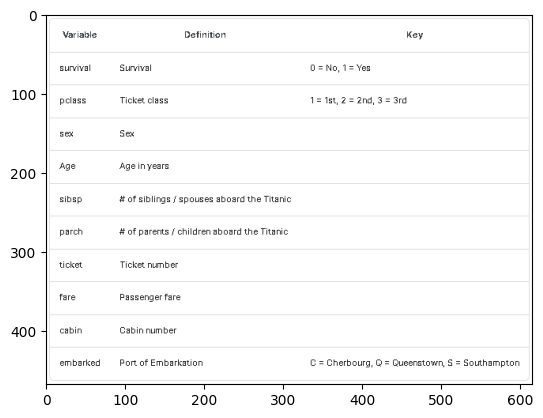

In [2]:
plt.imshow(plt.imread(".\dictionary.png"))

In [3]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.loc[df['SibSp']>3].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S


# 1-Selection des données

In [5]:
# On supprime les colonnes SibSp, Parch, Cabin et Ticket qui sont inutiles pour l'analyse
df.drop(columns=['SibSp', 'Parch', 'Cabin', 'Ticket'], inplace=True)

### Les types de variables, les valeurs manquantes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


# 2-Preprocessing

## Gestion des valeurs manquantes (NaN)

In [7]:
# On supprimed les lignes pour lesquelles Embarked est vide
df = df.loc[df['Embarked']==df['Embarked']]

In [8]:
# On peut supprimer maintenant cette colonne 'embarked'
df.drop(columns=['Embarked'], inplace=True)

In [9]:
# Nous ferons une imputation plus tard sur les lignes où l'âge est manquant plus tard

## Gestion des erreur de syntaxe 

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare'], dtype='object')

In [11]:
# On vérifie les valeurs uniques de toutes les variables ['Survived', 'Pclass', 'Sex']
for col in ['Survived', 'Pclass', 'Sex']:
    print(f'les valeurs unique dans la colonne {col} sont :',df[col].unique())

les valeurs unique dans la colonne Survived sont : [0 1]
les valeurs unique dans la colonne Pclass sont : [3 1 2]
les valeurs unique dans la colonne Sex sont : ['male' 'female']


In [12]:
# Pas d'erreur de syntaxe

## Gestion des doublons

In [13]:
df.duplicated().sum()

0

In [14]:
# Pas de doublon

## Gestion des outliers

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,32.096681
std,256.998173,0.486260,0.834700,14.492933,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [16]:
# Pas d'outliers évidents - nous préciserons plus tard avec des boxplots

## Exploratory Data Analysis

In [17]:
# Sera abordé au prochaine chapitre

# 3-Transformation des données

### Imputation

In [18]:
# Pour Age on va imputer la moyenne dans les cellules vides
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [19]:
# Vérification que l'imputation a été bien faite
df['Age'].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   Fare         889 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


### Hot Encoding

In [21]:
# Vérifions la colonne Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
# On va hotencoder cette colonne
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [23]:
le.classes_

array(['female', 'male'], dtype=object)

In [24]:
# Vérifions les labels
df['Survived'].unique()

array([0, 1], dtype=int64)

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.642093,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968346,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.642093,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200


In [26]:
df.to_csv("./df.csv",index=False, sep=';')

### Normalisation des données

In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.loc[:,['Pclass','Sex','Age','Fare']])
df_scaled = pd.DataFrame(df_scaled, columns=['Pclass','Sex','Age','Fare'])
df_scaled

,Pclass,Sex,Age,Fare
0,0.825209,0.735342,-5.896199e-01,-0.500240
1,-1.572211,-1.359911,6.448480e-01,0.788947
2,0.825209,-1.359911,-2.810029e-01,-0.486650
3,-1.572211,-1.359911,4.133853e-01,0.422861
4,0.825209,0.735342,4.133853e-01,-0.484133
...,...,...,...,...
884,-0.373501,0.735342,-2.038487e-01,-0.384475
885,-1.572211,-1.359911,-8.210826e-01,-0.042213
886,0.825209,-1.359911,-5.482138e-16,-0.174084
887,-1.572211,0.735342,-2.810029e-01,-0.042213


In [28]:
df_scaled.describe()

,Pclass,Sex,Age,Fare
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-2.437745e-16,4.395934e-17,-2.957264e-16,1.398706e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-1.572211e+00,-1.359911e+00,-2.254608e+00,-6.462044e-01
25%,-3.735013e-01,-1.359911e+00,-5.896199e-01,-4.872378e-01
50%,8.252086e-01,7.353420e-01,-5.482138e-16,-3.551972e-01
75%,8.252086e-01,7.353420e-01,4.133853e-01,-2.207954e-02
max,8.252086e-01,7.353420e-01,3.885326e+00,9.668551e+00


In [29]:
# On va rajouter les labels et exporter les données - Rm en passant : PassengerId a disparu. Ca n'a pas d'impact pour la suite de l'analyse
df_scaled['Survived'] = df['Survived']
df_scaled

,Pclass,Sex,Age,Fare,Survived
0,0.825209,0.735342,-5.896199e-01,-0.500240,0.0
1,-1.572211,-1.359911,6.448480e-01,0.788947,1.0
2,0.825209,-1.359911,-2.810029e-01,-0.486650,1.0
3,-1.572211,-1.359911,4.133853e-01,0.422861,1.0
4,0.825209,0.735342,4.133853e-01,-0.484133,0.0
...,...,...,...,...,...
884,-0.373501,0.735342,-2.038487e-01,-0.384475,0.0
885,-1.572211,-1.359911,-8.210826e-01,-0.042213,0.0
886,0.825209,-1.359911,-5.482138e-16,-0.174084,0.0
887,-1.572211,0.735342,-2.810029e-01,-0.042213,1.0


In [30]:
df_scaled.to_csv("df_scaled.csv",index=False, sep=';')